In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
sal=pd.read_csv("C:/Users/DELL/Downloads/assignment/Support_Vector_Machines/SalaryData_Train(1).csv")
sal.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
sal.shape

(30161, 14)

In [5]:
sal.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

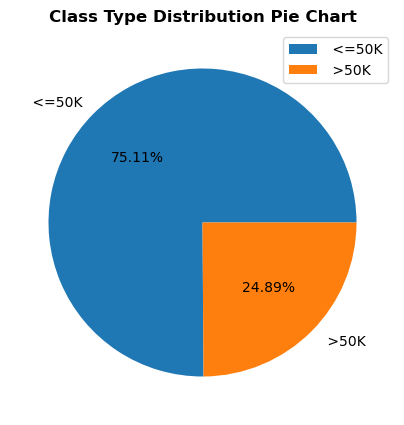

In [6]:
plt.figure(figsize = (5,5))
plt.pie(sal['Salary'].value_counts(),
       labels=sal.Salary.unique(),
       autopct= '%.2f%%')
plt.legend(loc= 'upper right')      
plt.title("Class Type Distribution Pie Chart", fontsize = 12, fontweight = 'bold')
plt.show()

In [7]:
sal.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

### Assigning Dummy Values

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
def label_encoding(sal):
    
    for column_name in sal.columns:
        if sal[column_name].dtype == object:
            sal[column_name] = le.fit_transform(sal[column_name])
        else:
            pass

In [9]:
label_encoding(sal)

In [10]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   education      30161 non-null  int32
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int32
 5   occupation     30161 non-null  int32
 6   relationship   30161 non-null  int32
 7   race           30161 non-null  int32
 8   sex            30161 non-null  int32
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int32
 13  Salary         30161 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.2 MB


In [11]:
sal.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


### Detecting Outliers

In [12]:
numerical_features=sal.describe(include=["int64","float64","int32"]).columns
numerical_features

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [13]:
def outlier(sal):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in sal.columns.tolist():
        Q1 = np.percentile(sal[col], 25)
        Q3 = np.percentile(sal[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = sal[(sal[col] < Q1 - outlier_step) | (sal[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier(sal[numerical_features]))))
print(outlier(sal[numerical_features]))

The dataset contains 3507 observations with more than 2 outliers
[206, 301, 845, 901, 1796, 2376, 2460, 2526, 2669, 3247, 3468, 4323, 4357, 4921, 4953, 5509, 5542, 5675, 5713, 5730, 6066, 7597, 8132, 8251, 8287, 8995, 9147, 9749, 10387, 11718, 12219, 12302, 12621, 12679, 12895, 12922, 13113, 13621, 13661, 13784, 13802, 13989, 14721, 15095, 15448, 15649, 15749, 15768, 16318, 16718, 16819, 17355, 17654, 17771, 18067, 18086, 18249, 18373, 18403, 18412, 18850, 18924, 19272, 19371, 19544, 19919, 20160, 20830, 21022, 21639, 21736, 22282, 22613, 23518, 24318, 24934, 25228, 25485, 25560, 25758, 26114, 26141, 26380, 26620, 27011, 27424, 29469, 29508, 29982, 30071, 11, 32, 42, 49, 66, 88, 97, 103, 108, 125, 145, 167, 175, 183, 193, 221, 232, 235, 245, 251, 260, 264, 287, 290, 318, 327, 380, 388, 404, 418, 477, 510, 519, 547, 581, 588, 589, 604, 608, 618, 630, 690, 703, 737, 748, 803, 804, 822, 839, 844, 872, 880, 890, 919, 921, 930, 949, 951, 966, 968, 971, 973, 988, 1010, 1012, 1014, 1015, 1017

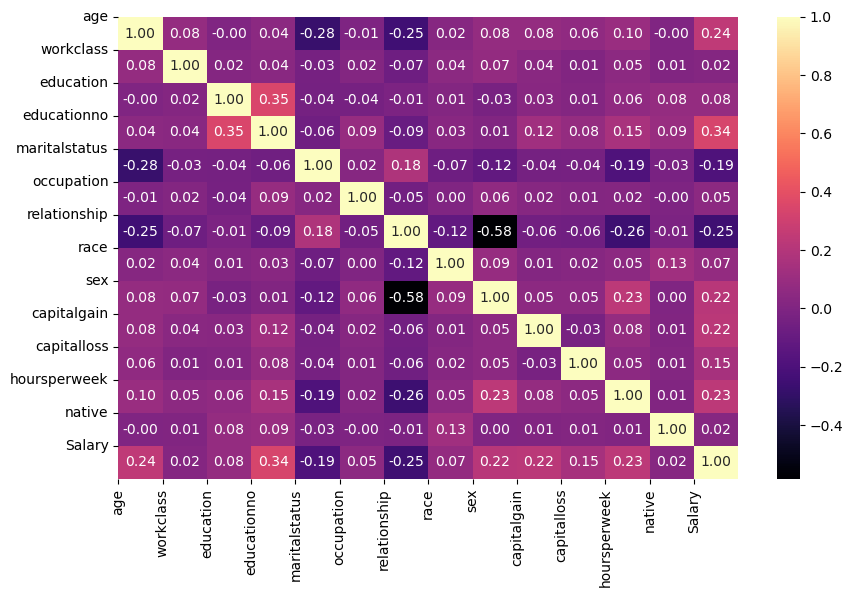

In [14]:
corr = sal.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [15]:
# applying standardization
scaler=StandardScaler()
sal_std=scaler.fit_transform(sal.drop(['Salary'],axis=1))
sal_std

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [16]:
# pca=PCA(random_state=10,n_components=0.95)
# sal_pca=pca.fit_transform(sal_std)
# sal_pca

In [17]:
# print(pca.singular_values_)

In [18]:
# np.round(np.cumsum(pca.explained_variance_ratio_*100),decimals=2)

In [19]:
# finalDF=pd.concat([pd.DataFrame(sal_pca[:,0:9],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])],axis=1)
# finalDF

In [20]:
from sklearn import svm
from sklearn.svm import SVC

In [21]:
X=sal_std
print(X)
Y=sal['Salary'].values
print(Y)

[[ 0.04277892  2.93594688 -0.34982703 ... -0.21850808 -0.07773541
   0.26635842]
 [ 0.88026081  1.88764517 -0.34982703 ... -0.21850808 -2.33149486
   0.26635842]
 [-0.0333558  -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 ...
 [ 1.48933854 -0.20895825  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]
 [-1.25151126 -0.20895825  0.1748048  ... -0.21850808 -1.74718685
   0.26635842]
 [ 1.03253024  0.83934346  0.1748048  ... -0.21850808 -0.07773541
   0.26635842]]
[0 0 0 ... 0 0 1]


### Train & Test split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=45,stratify=Y)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((21112, 13), (9049, 13), (21112,), (9049,))

In [24]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [25]:
y_pred=clf.predict(x_test)

In [26]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
acc=accuracy_score(y_test,y_pred)*100
print('accuracy=',acc)

accuracy= 84.3518620842082


In [28]:
# Hyperparameter tuning
param_grid={'C':np.arange(0.1,10), 'gamma':[0.001,0.01,0.1,0.2,0.5,0.9,1,10],'kernel':['rbf','linear']}

grid=RandomizedSearchCV(clf,param_distributions=param_grid,cv=5,random_state=42,n_jobs=-1)

grid.fit(x_train,y_train)
print(grid.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 6.1}


In [29]:
clf1=SVC(C=6.1,gamma=0.1,kernel='rbf')
clf1.fit(x_train,y_train)

SVC(C=6.1, gamma=0.1)

In [30]:
y_pred1=clf1.predict(x_train)

In [31]:
accu=accuracy_score(y_train,y_pred1)*100
print("accuracy score=",accu)

accuracy score= 86.69477074649488


In [32]:
confusion_matrix(y_train,y_pred1)

array([[15026,   831],
       [ 1978,  3277]], dtype=int64)

In [33]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15857
           1       0.80      0.62      0.70      5255

    accuracy                           0.87     21112
   macro avg       0.84      0.79      0.81     21112
weighted avg       0.86      0.87      0.86     21112



In [34]:
y_pred_test=clf1.predict(x_test)

In [35]:
accur=accuracy_score(y_test,y_pred_test)*100
print("accuracy score=",accur)

accuracy score= 84.44026964305448


In [36]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6796
           1       0.74      0.59      0.65      2253

    accuracy                           0.84      9049
   macro avg       0.80      0.76      0.78      9049
weighted avg       0.84      0.84      0.84      9049



In [37]:
y_pred_df=pd.DataFrame({'actual':y_test,'Prediction':y_pred_test})
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
y_pred_df

,actual,Prediction,Correct
0,0,0,True
1,0,0,True
2,1,0,False
3,0,0,True
4,0,0,True
...,...,...,...
9044,0,1,False
9045,0,0,True
9046,1,1,True
9047,1,1,True


In [38]:
y_pred_df['Correct'].value_counts()

True     7641
False    1408
Name: Correct, dtype: int64

In [39]:
y_pred_df[y_pred_df['Correct']==False]

,actual,Prediction,Correct
2,1,0,False
6,1,0,False
8,0,1,False
9,0,1,False
18,0,1,False
...,...,...,...
9025,0,1,False
9031,1,0,False
9034,1,0,False
9035,1,0,False


### Applying imbalance technique

In [40]:
from imblearn.combine import SMOTEENN

In [41]:
sm=SMOTEENN(random_state=1)
x_resampled,y_resampled=sm.fit_resample(X,Y)

In [42]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=1)

In [44]:
model=SVC()
model.fit(xr_train,yr_train)

SVC()

In [45]:
y_pred_r = model.predict(xr_test)
accuracy_test_r= np.mean(y_pred_r== yr_test)
accuracy_test_r

0.9368862520458265

In [46]:
print(classification_report(yr_test,y_pred_r))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4868
           1       0.93      0.94      0.94      4908

    accuracy                           0.94      9776
   macro avg       0.94      0.94      0.94      9776
weighted avg       0.94      0.94      0.94      9776



In [47]:
y_pred_train = model.predict(xr_train)
accuracy_train_r= np.mean(y_pred_train== yr_train)
accuracy_train_r

0.9430512932924157

In [50]:
print(classification_report(yr_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11065
           1       0.94      0.95      0.94     11745

    accuracy                           0.94     22810
   macro avg       0.94      0.94      0.94     22810
weighted avg       0.94      0.94      0.94     22810



In [48]:
y_pred_df=pd.DataFrame({'actual':yr_test,'Prediction':y_pred_r})
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
display(y_pred_df)

,actual,Prediction,Correct
0,1,1,True
1,1,1,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
9771,0,0,True
9772,1,0,False
9773,1,1,True
9774,1,1,True


In [49]:
y_pred_df['Correct'].value_counts()

True     9159
False     617
Name: Correct, dtype: int64

## This model is giving 94%, applying test data on it.

In [51]:
sal_test=pd.read_csv(r"F:\Data Science\Assignments\Completed\17. SVM\SalaryData_Test(1).csv")
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [52]:
sal_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Assigning Dummy Variables

In [53]:
le=preprocessing.LabelEncoder()
def label_encoding(sal_test):
    
    for column_name in sal_test.columns:
        if sal_test[column_name].dtype == object:
            sal_test[column_name] = le.fit_transform(sal_test[column_name])
        else:
            pass

In [54]:
label_encoding(sal_test)
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [55]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int32
 2   education      15060 non-null  int32
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int32
 5   occupation     15060 non-null  int32
 6   relationship   15060 non-null  int32
 7   race           15060 non-null  int32
 8   sex            15060 non-null  int32
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int32
 13  Salary         15060 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.1 MB


In [64]:
# applying standardization
scaler=StandardScaler()
sal_test_std=scaler.fit_transform(sal_test.drop(['Salary'],axis=1))
sal_test_std

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

### Assigning X & Y.

In [65]:
x=sal_test_std
y=sal_test['Salary'].values

In [66]:
sm=SMOTEENN(random_state=1)
x_resamp,y_resamp=sm.fit_resample(x,y)

### Predicting on test data

In [67]:
y_pred_new = model.predict(x_resamp)
accuracy_test_new= np.mean(y_pred_new== y_resamp)
accuracy_test_new

0.929262210327839

In [68]:
print(classification_report(y_resamp,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7953
           1       0.93      0.93      0.93      8488

    accuracy                           0.93     16441
   macro avg       0.93      0.93      0.93     16441
weighted avg       0.93      0.93      0.93     16441



In [69]:
y_pred_df=pd.DataFrame({'actual':y_resamp,'Prediction':y_pred_new})
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
display(y_pred_df)

,actual,Prediction,Correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
16436,1,1,True
16437,1,1,True
16438,1,1,True
16439,1,1,True


In [70]:
y_pred_df['Correct'].value_counts()

True     15278
False     1163
Name: Correct, dtype: int64

In [71]:
y_pred_df[y_pred_df['Correct']==False]

,actual,Prediction,Correct
20,0,1,False
58,0,1,False
71,0,1,False
87,0,1,False
100,0,1,False
...,...,...,...
16335,1,0,False
16345,1,0,False
16346,1,0,False
16385,1,0,False
